<a href="https://colab.research.google.com/github/pavithrasenth/Hand_Detection/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
from google.colab import files
uploaded = files.upload(r"C:\Users\Admin\Downloads\train.csv")


Saving train.csv to C:\Users\Admin\Downloads\train.csv/train (1).csv


In [19]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Admin\Downloads\train.csv/train (1).csv")


In [20]:
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())
print("\nMissing values:\n", data.isnull().sum())
print("\nSurvival counts:\n", data['Survived'].value_counts())

Dataset shape: (891, 12)

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0      

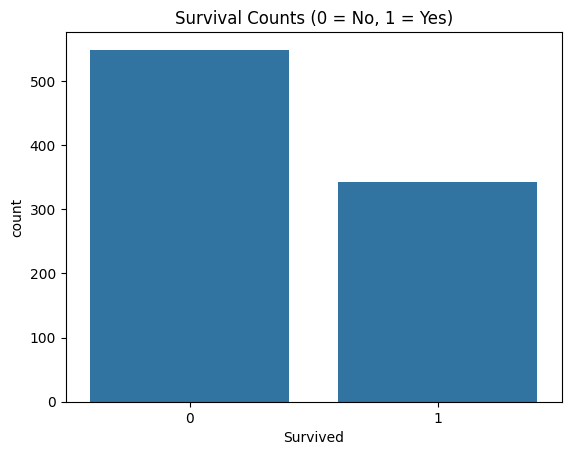

In [21]:
sns.countplot(x="Survived", data=data)
plt.title("Survival Counts (0 = No, 1 = Yes)")
plt.show()

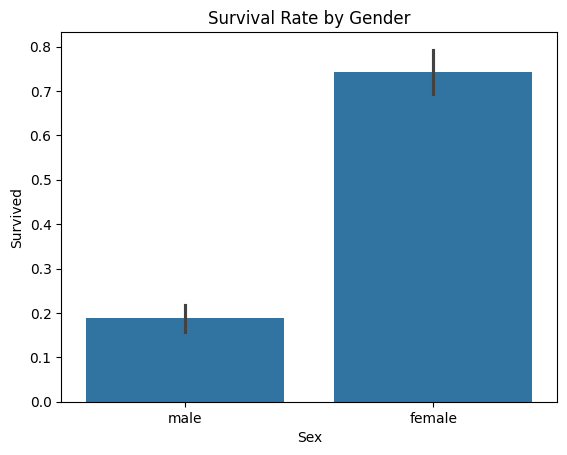

In [22]:
sns.barplot(x="Sex", y="Survived", data=data)
plt.title("Survival Rate by Gender")
plt.show()

In [25]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [26]:
if 'Cabin' in data.columns:
    data = data.drop(columns=['Cabin'])

In [27]:
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

In [28]:
data['FamilySize'] = data['SibSp'] + data['Parch']

In [29]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']]
y = data['Survived']

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
input_dim = X_train.shape[1]

model = Sequential([
    Input(shape=(input_dim,)),   # Now it always matches your data
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6173 - loss: 0.6419 - val_accuracy: 0.7877 - val_loss: 0.5204
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8100 - loss: 0.4966 - val_accuracy: 0.7821 - val_loss: 0.4478
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7934 - loss: 0.4644 - val_accuracy: 0.7933 - val_loss: 0.4375
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8182 - loss: 0.4202 - val_accuracy: 0.7989 - val_loss: 0.4376
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8173 - loss: 0.4292 - val_accuracy: 0.7989 - val_loss: 0.4346
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8227 - loss: 0.4141 - val_accuracy: 0.8045 - val_loss: 0.4356
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8322 - loss: 0.4282 - val_accuracy: 0.8045 - val_loss: 0.4380
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8185 - loss: 0.3995 - val_accuracy: 0.7989 - val_loss:

In [41]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nFinal Accuracy on test data: {acc:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8311 - loss: 0.4343 

Final Accuracy on test data: 0.82


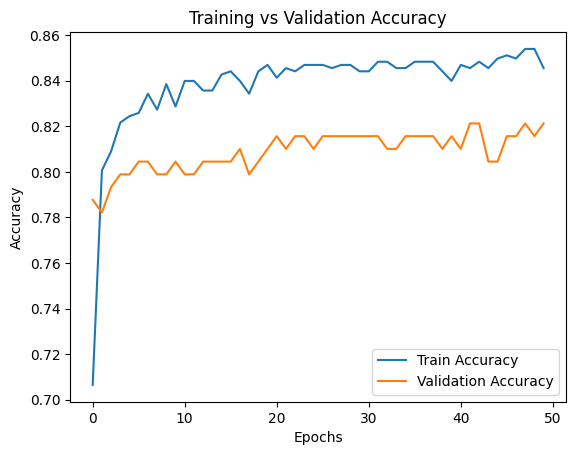

In [42]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()